DATE
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
Name: UNRATE, dtype: float64


<ipython-input-5-98e24db68d08>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


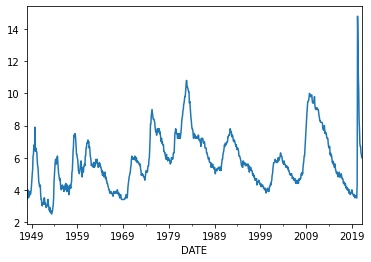

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
 
series = read_csv('UNRATE.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) 
print(series.head())
series.plot()
pyplot.show()


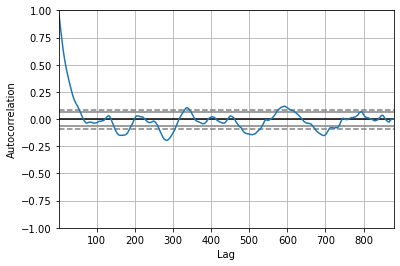

In [6]:
autocorrelation_plot(series)
pyplot.show()

<ipython-input-8-9b7e70d547da>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                 UNRATE   No. Observations:                  879
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -492.060
Date:                Tue, 11 May 2021   AIC                            996.120
Time:                        11:24:41   BIC                           1024.786
Sample:                    01-31-1948   HQIC                          1007.084
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0465      0.009      5.427      0.000       0.030       0.063
ar.L2         -0.0424      0.010     -4.244      0.000      -0.062      -0.023
ar.L3          0.0140      0.017      0.803      0.4

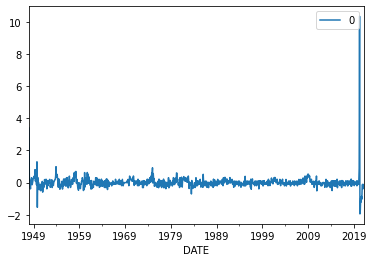

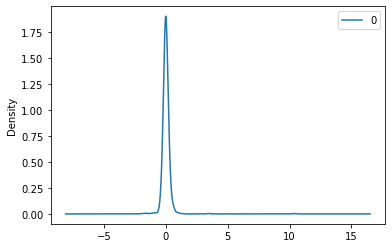

                0
count  879.000000
mean     0.006900
std      0.438997
min     -1.951968
25%     -0.111086
50%     -0.005454
75%      0.105628
max     10.359514


In [8]:

# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

series = read_csv('UNRATE.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [13]:

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset

series = read_csv('UNRATE.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


<ipython-input-13-8f0955d396eb>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=5.586722, expected=5.600000
predicted=5.614511, expected=5.300000
predicted=5.302226, expected=5.500000
predicted=5.443122, expected=5.100000
predicted=5.106204, expected=5.200000
predicted=5.114295, expected=5.200000
predicted=5.154561, expected=5.400000
predicted=5.399811, expected=5.400000
predicted=5.421343, expected=5.300000
predicted=5.336391, expected=5.200000
predicted=5.192547, expected=5.200000
predicted=5.179523, expected=5.100000
predicted=5.076580, expected=4.900000
predicted=4.858846, expected=5.000000
predicted=4.932578, expected=4.900000
predicted=4.884868, expected=4.800000
predicted=4.766301, expected=4.900000
predicted=4.855253, expected=4.700000
predicted=4.706876, expected=4.600000
predicted=4.552039, expected=4.700000
predicted=4.648436, expected=4.600000
predicted=4.599218, expected=4.600000
predicted=4.567724, expected=4.700000
predicted=4.685806, expected=4.300000
predicted=4.320710, expected=4.400000
predicted=4.316357, expected=4.500000
predicted=4.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.445872, expected=7.600000
predicted=7.537964, expected=7.500000
predicted=7.479347, expected=7.500000
predicted=7.448387, expected=7.300000
predicted=7.268429, expected=7.200000
predicted=7.155231, expected=7.200000
predicted=7.137071, expected=7.200000
predicted=7.170754, expected=6.900000
predicted=6.867069, expected=6.700000
predicted=6.617602, expected=6.600000
predicted=6.507537, expected=6.700000
predicted=6.627584, expected=6.700000
predicted=6.662599, expected=6.200000
predicted=6.176273, expected=6.300000
predicted=6.186888, expected=6.100000
predicted=6.055273, expected=6.200000
predicted=6.133285, expected=6.100000
predicted=6.045805, expected=5.900000
predicted=5.884637, expected=5.700000
predicted=5.622801, expected=5.800000
predicted=5.730603, expected=5.600000
predicted=5.563606, expected=5.700000
predicted=5.634250, expected=5.500000
predicted=5.476740, expected=5.400000
predicted=5.363151, expected=5.400000
predicted=5.334290, expected=5.600000
predicted=5.

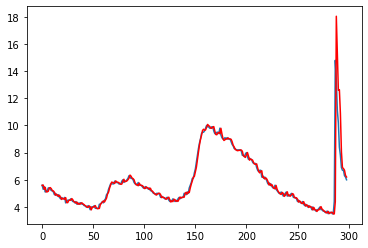

In [12]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()